<a href="https://colab.research.google.com/github/Suhyun77/Algorithm-and-Data-Structure/blob/main/%EB%8B%A4%EC%9D%B4%EB%82%98%EB%AF%B9_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **다이나믹 프로그래밍, 동적 계획법**

- 메모리를 적절히 사용해 **수행 시간 효율성**을 비약적으로 향상시키는 방법
- 이미 계산된 결과(작은 문제)는 **별도의 메모리 영역에 저장**하여 다시 계산하지 않도록 합니다. 
- **탑다운(Top Down)** 방식 & **보텀업(Bottom Up)** 방식

</br>

다이나믹 프로그래밍은 다음의 2가지 조건을 만족해야만 한다.
1. **최적 부분 구조 (Optimal Substructure)**
    
    : 큰 문제를 작은 문제로 나눌 수 있으며 작은 문제의 답을 모아 큰 문제를 해결할 수 있다.

2. **중복되는 부분 문제 (Overlapping Subproblem)**

    : 동일한 작은 문제를 반복적으로 해결해야 한다.

즉, **문제를 작게 쪼갤 수 있는지, 그리고 쪼갠 것 중에 중복되는 것이 있는지**를 보아야하는 것이다.

## **피보나치 수열**

In [ ]:
# 피보나치 수열  by 재귀함수
def fibo(x):
    if x==1 or x==2:  # 언제 재귀함수가 더이상 재귀적으로 호출되지않고 멈출지에 대해 종료조건 명시해야함
        return 1
    return fibo(x - 1) + fibo(x - 2)

**피보나치 수열의 점화식 표현**

- $a_n = a_{n-1} + a_{n-2} : 재귀함수$ 

- $a_1=1, a_2=1 : 종료 조건 $

그러나, 단순 재귀 함수로 피보나치 수열을 해결하면 지수 시간 복잡도를 갖게 되며

아래 그림과 같이 **중복되는 부분 문제($=f(2)$)**가 많아진다.

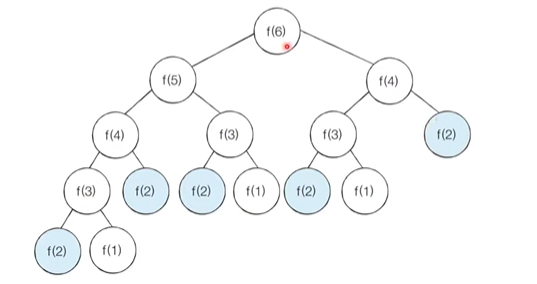

피보나치 수열의 시간 복잡도는 다음과 같다.
</br>

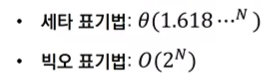

아래를 보면 수가 커지면 커질수록 연산 수행 횟수가 기하급수적으로 늘어나는 것을 알 수 있다.

$f(30) = 2^{30}$, $f(100) = 2^{100}$

## **구현 방법**
### 메모이제이션(Memoization), 탑다운 vs 보텀업


- 한 번 계산한 결과를 메모리 공간에 메모하는 기법
- 중복되는 문제의 결과를 메모리 공간에 따로 저장해놓고 또 다시 중복되는 문제가 나올 때 이 값을 활용하는 것
- 값을 기록해 놓는다는 점에서 캐싱(Cashing)이라고도 한다.
- 엄밀히 말하면 메모이제이션은 이전에 계산된 결과를 일시적으로 기록해 놓는 넓은 개념을 의미하므로 다이나믹 프로그래밍에 국한된 개념은 아니다.
- 한 번 계산된 결과를 담아 놓기만 하고 다이나믹 프로그래밍을 위해 활용하지 않을 수도 있다.

|탑다운(메모이제이션)|보텀업|
|:---:|:---:|
|하향식|상향식(전형적인 형태)|
|재귀함수|반복문|
|리스트|리스트=**DP 테이블**|


In [1]:
### 피보나치 수열 : 탑다운 ###

# 한 번 계산된 결과를 메모이제이션하기 위한 리스트 초기화
d = [0] *100

# 피보나치 함수(Fibonacci Function)를 재귀함수로 구현(탑다운 다이나믹 프로그래밍)
def fibo(x):
    # 종료 조건(1 혹은 2일 때 1을 반환)
    if x == 1 or x ==2:
        return 1
    # 이미 계산한 적 있는 문제라면 메모이제이션 리스트 값 반환
    if d[x] != 0:
        return d[x]
    # 아직 계산하지 않은 문제라면 점화식에 따라서 피보나치 결과 반환
    d[x] = fibo(x-1) + fibo(x-2)
    return d[x]

print(fibo(99))

218922995834555169026


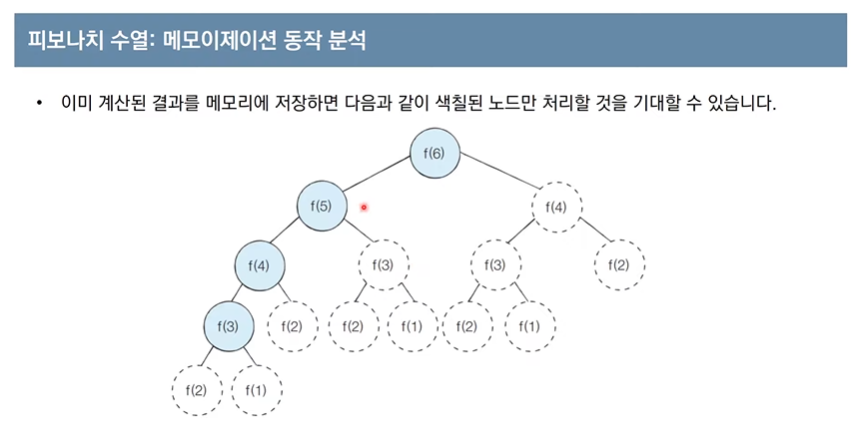

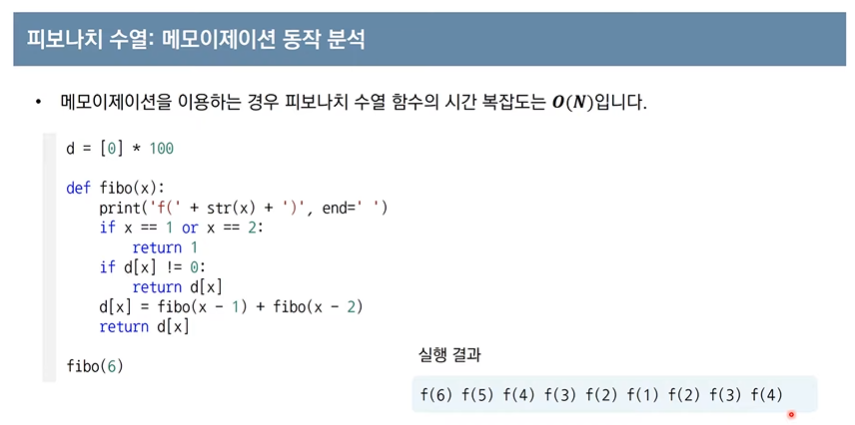

In [2]:
### 피보나치 수열 : 보텀업 ###

# 앞서 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [0] * 100

# 첫 번째 피보나치 수와 두 번째 피보나치 수는 1
d[1] = 1
d[2] = 1
n = 99

# 피보나치 함수 "반복문"으로 구현 (보텀업 다이나믹 프로그래밍)
for i in range(3, n+1):
    d[i] = d[i-1] + d[i-2]
print(d[n])

218922995834555169026


## **다이나믹 프로그래밍 VS 분할 정복**
- 공통점 : 모두 최적 부분 구조를 가질 때 사용할 수 있다.
- 차이점 : 부분 문제의 정복 (다이나믹O, 분할 정보X)